<a href="https://colab.research.google.com/github/alvinkimbowa/low-field-mri/blob/main/Code/Exploratory_data_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Obtain the image data from drive

In [4]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ln -s '/content/drive/My Drive/Low Field MRI' /mydrive

Mounted at /content/drive
ln: failed to create symbolic link '/mydrive/Low Field MRI': Operation not supported


In [16]:
import os

# Low-Field MRI Data
print("Copying low field MRI data (axial 60 dataset)...")
dst = 'axial_10days_images'
if os.path.exists(dst):
    !rm -r "{dst}"
!cp -r "/mydrive/Datasets/SG Data/{dst}.zip" "/content"
!unzip -o -q 'axial_10days_images.zip' -d '/content'
print("Done!")

# 3T data
print("Copying the high filed MRI data (IXI dataset)...")
!cp '/mydrive/Datasets/IXI Brain dataset/IXI-T2.tar' /content
dst = 'IXI-T2'
if os.path.exists(dst):
    !rm -r '{dst}'
!mkdir '{dst}'
!tar -xf "IXI-T2.tar" -C "{dst}"
print("Done!")

Copying low field MRI data (axial 60 dataset)...
Done!
Copying the high filed MRI data (IXI dataset)...
Done!


# Import necessary libraries

In [7]:
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image
from pprint import pprint

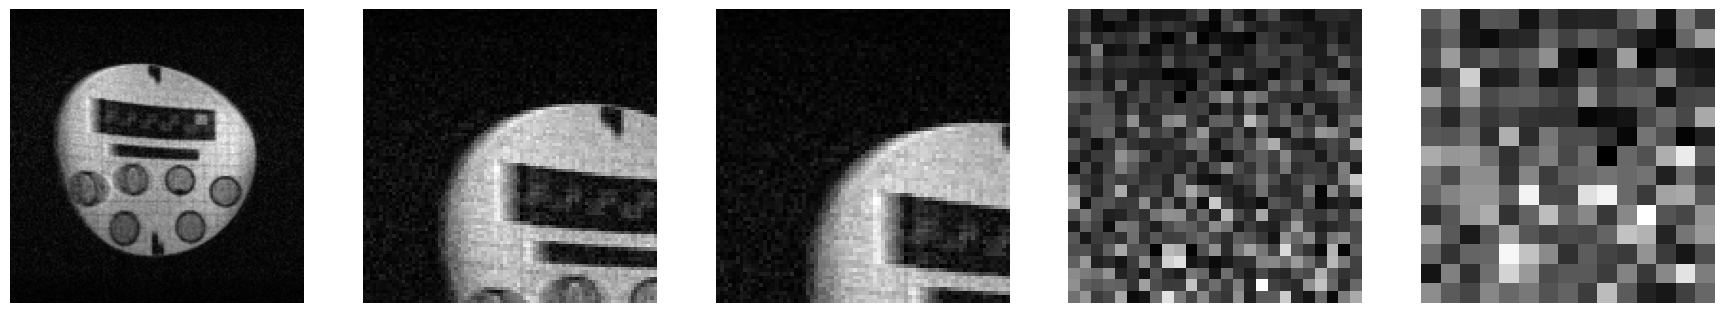

In [18]:
sample_img = np.load('/content/axial_10days_images/Day10_01142023/Session1_11AM/5.npy')

fig = plt.figure(figsize=(22,6))

ax = fig.add_subplot(1,5,1)
ax.imshow(sample_img, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1,5,2)
patch = sample_img[:90,:90]
ax.imshow(patch, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1,5,3)
patch = sample_img[:75,:75]
ax.imshow(patch, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1,5,4)
patch = sample_img[:25,:25]
ax.imshow(patch, cmap='gray')
ax.axis('off')

ax = fig.add_subplot(1,5,5)
patch = sample_img[:15,:15]
ax.imshow(patch, cmap='gray')
ax.axis('off')

plt.show()

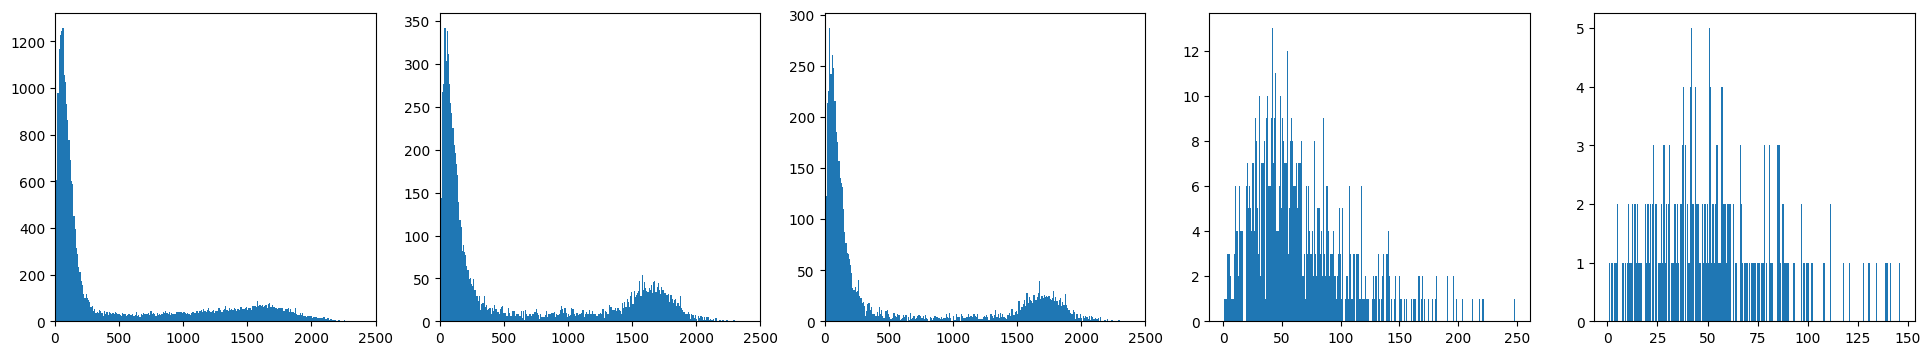

In [19]:
fig = plt.figure(figsize=(24,4))

ax = fig.add_subplot(1,5,1)
ax.hist(sample_img.ravel(), bins=256)
ax.set_xlim(0,2500)
# ax.axis('off')

ax = fig.add_subplot(1,5,2)
patch = sample_img[:90,:90]
ax.hist(patch.ravel(), bins=256)
ax.set_xlim(0,2500)
# ax.axis('off')

ax = fig.add_subplot(1,5,3)
patch = sample_img[:75,:75]
ax.hist(patch.ravel(), bins=256)
ax.set_xlim(0,2500)
# ax.axis('off')

ax = fig.add_subplot(1,5,4)
patch = sample_img[:25,:25]
ax.hist(patch.ravel(), bins=256)
# ax.set_xlim(0,2500)
# ax.axis('off')

ax = fig.add_subplot(1,5,5)
patch = sample_img[:15,:15]
ax.hist(patch.ravel(), bins=256)
# ax.set_xlim(0,2500)
# ax.axis('off')

plt.show()

# Load 3T dataset

In [20]:
import os
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [21]:
img = nib.load("IXI-T2/IXI014-HH-1236-T2.nii.gz")
img = img.get_fdata()
img.shape

(256, 256, 28)

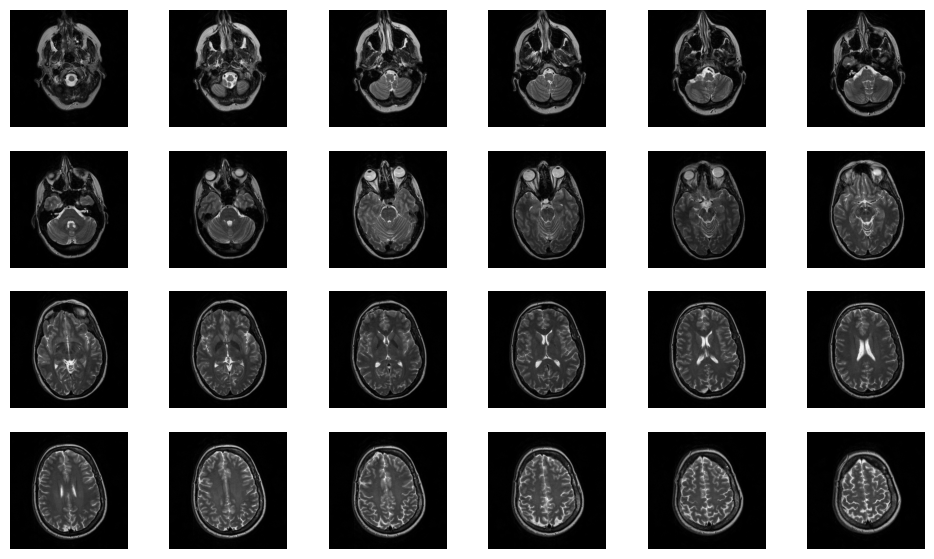

In [23]:
def plot_slices(slices):
    """ Function to display row of image slices """
    num_slices = slices.shape[-1]
    fig, axes = plt.subplots(4, 6, figsize=(12,7))
    axes = axes.flatten()
    for i in range(0, 24):
        slice = slices[:,:,i]
        axes[i].imshow(slice.T, cmap="gray", origin="lower")
        axes[i].axis("off")

plot_slices(img)

# Generate noise
The noise should have a similar distribution as that obtained from the low-field MRI images.

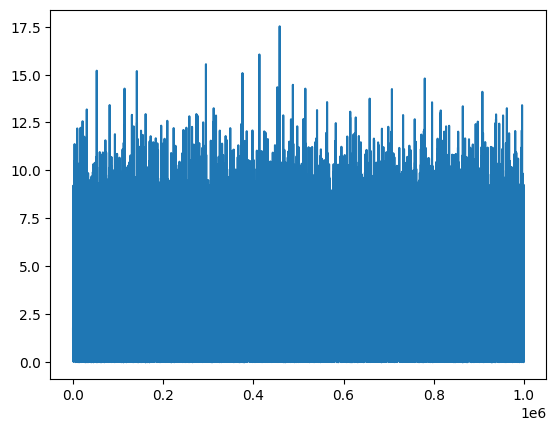

In [27]:
import numpy as np
import matplotlib.pyplot as plt

shape, scale = 2., 1. # mean and width
s = np.random.standard_gamma(shape, 1000000)

plt.plot(s)
plt.show()

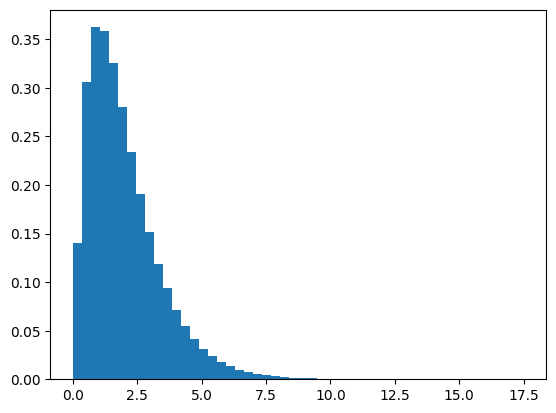

In [28]:
count, bins, ignored = plt.hist(s, 50, density=True)

# Add noise to 3T data